In [6]:
import csv
import matplotlib
# import seaborn
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
from scipy.stats import ttest_ind
import scipy.stats as stats
import scipy.stats as ss
from matplotlib import style
import matplotlib.gridspec as gridspec
import matplotlib.patches as patches
# matplotlib.style.use('ggplot')
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (6, 4)
import pandas as pd
from scipy.stats import binom
import  statsmodels.stats.multitest as multitest

from sklearn.decomposition import RandomizedPCA, PCA, TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import seaborn

plt.style.context("seaborn-whitegrid")
plt.rcParams["axes.edgecolor"] = "0.15"
plt.rcParams["axes.linewidth"]  = 1.25
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
# need to apply the similar model established in mutsigcv to account for replicate time, expression level and chromatin states
# https://media.nature.com/original/nature-assets/nature/journal/v499/n7457/extref/nature12213-s1.pdf

In [2]:
wkdir = '/projects/trans_scratch/validations/workspace/szong/Cervical/hotspots/123_patients/'

In [3]:
f2_1 = '/home/szong/projects/resource/chrominfo.txt'
df2_1 = pd.read_csv(f2_1, sep='\t', usecols=['#chrom', 'size'])
df2_1['chr'] = df2_1['#chrom'].apply(lambda x: x.replace('chr', ''))
chr_sizes = df2_1.set_index('chr').drop('#chrom', axis=1)
chr_sizes = chr_sizes.reset_index().replace('X', '23').replace('Y', '24').iloc[:24,].set_index('chr')
chr_sizes.index = chr_sizes.index.astype(int)
chr_sizes = chr_sizes.sort_index()
chr_sizes.head(2)
chr_length = chr_sizes['size']

,size
chr,
1,249250621
2,243199373


In [5]:
# f2_2 = '{}123_pats_all_strelka_noncoding_mutations_new.txt'.format(wkdir)
# df2_2 = pd.read_csv(f2_2, sep='\t', header=None)
# df2_2.columns = ['chrom', 'start', 'end', 'patient', 'ref', 'alt', 'type']
# df2_2.head(2)

In [6]:
# df2_2.shape

In [7]:
# chr_mut_rate = df2_2.groupby('chrom').count()

# dfm1 = pd.merge(chr_mut_rate, chr_sizes, left_index=True, right_index=True)[['start', 'size']]

# dfm1.head(2)

# dfm1.loc[max(dfm1.index)+1,:] = None

# # dfm1


# dfm1['chr_mut_rate'] = dfm1['start']/dfm1['size']*1e6

# accu = dfm1['size'].cumsum().shift()

# dfm1['accu_start'] = accu

# dfm1['accu_end'] = dfm1['accu_start'].shift(-1)

# dfm1.fillna(0, inplace=True)
# dfm1.drop(24, inplace=True)



In [8]:
inf0 = '{}sliding_window_mutaional_distance_merged_overlap_promoter_txn_factor_merged.txt'.format(wkdir)
df0 = pd.read_csv(inf0, sep='\t', header=None)
df0.columns = ['chrom', 'hs_start', 'hs_end']
df0 = df0.set_index(['chrom', 'hs_start', 'hs_end'])
df0.shape
df0.head(2)

(842, 0)

Empty DataFrame
Columns: []
Index: [(1, 10089, 10578), (1, 16132, 16352)]

In [9]:
inf = '{}sliding_window_mutaional_distance_merged_overlap_promoter_txn_factor_merged_with_patients.txt'.format(wkdir)
df1 = pd.read_csv(inf, header=None, sep='\t', usecols=[0,1,2,3,4,5, 6,7,8])

df1.columns = ['chrom', 'hs_start', 'hs_end', 'patient', 'v_chrom', 'v_pos',  'ref', 'alt', 'type']

In [10]:
df1.tail()

,chrom,hs_start,hs_end,patient,v_chrom,v_pos,ref,alt,type
2978,22,49779671,49780417,HTMCP-03-06-02230,22,49779935,A,G,intergenic_region
2979,22,49779671,49780417,HTMCP-03-06-02238,22,49780333,G,A,intergenic_region
2980,22,49779671,49780417,HTMCP-03-06-02330,22,49779914,T,G,INTERGENIC
2981,22,49779671,49780417,HTMCP-03-06-02344,22,49780309,A,G,INTERGENIC
2982,22,49779671,49780417,HTMCP-03-06-02447,22,49780412,C,T,INTERGENIC


In [85]:
inf = '/projects/trans_scratch/validations/workspace/szong/Cervical/variant_bwamem/124_patients/mutation_load_clinic.txt'
clinic = pd.read_csv(inf, sep='\t', index_col='patient')
clinic.head(2)

,snv_counts,indel_counts,snv_sns_counts,indel_sns_counts,snv_syno_counts,indel_syno_counts,strelka_mutations,strelka_coding_mutations,strelka_syno_mutations,strelka_nsyno_mutations,...,live_birth_pregnancy_count,menopause_status,nadir_cd4_counts,patient_id,pregnancies_count_induced_abortion,pregnancies_count_miscarriage,tobacco_smoking_history_indicator,total_pregnancy_count,tumor_grade,weight_kg_at_diagnosis
patient,,,,,,,,,,,,,,,,,,,,,
HTMCP-03-06-02001,25732,1242,329,11,102,0,26974,340,102,238,...,5.0,Post (prior bilateral ovariectomy OR >12 mo si...,NaN,2001.0,NaN,1.0,1.0,6.0,G2,44.5
HTMCP-03-06-02002,15964,697,225,2,72,0,16661,227,72,155,...,8.0,Post (prior bilateral ovariectomy OR >12 mo si...,NaN,2002.0,3.0,NaN,1.0,11.0,G3,70.2


In [87]:
assert ('HTMCP-03-06-02061' in clinic.index) == False
HIV_pos = clinic.query('HIV_status == "{}"'.format('Positive')).index.tolist()
HIV_neg = clinic.query('HIV_status == "{}"'.format('Negative')).index.tolist()
len(HIV_pos)
len(HIV_neg)

74

49

In [95]:
dfn = pd.DataFrame(df1.groupby(['chrom', 'hs_start', 'hs_end'])['patient'].apply(set))

In [103]:
dfn['num_hiv_pos_patients'] = dfn.patient.apply(lambda x: len([i for i in x if i in HIV_pos]))
dfn['num_hiv_neg_patients'] = dfn.patient.apply(lambda x: len([i for i in x if i in HIV_neg]))
dfn['num_total_patients'] = dfn.num_hiv_neg_patients + dfn.num_hiv_pos_patients

In [107]:
df4.sort_values(['chrom', 'hs_start', 'hs_end']).head(10)

,chrom,hs_start,hs_end,num_mutated_bases,num_patients,pvalue,accu_start,fdr_bh,num_patients_per_kb
0,1,10089,10578,16,16,1.907363e-13,10089.0,5.353333e-12,32.719836
1,1,16132,16352,3,3,5.792843e-05,16132.0,2.049401e-04,13.636364
2,1,534400,534545,1,1,8.088867e-03,534400.0,1.741899e-02,6.896552
3,1,825798,826272,5,5,6.384101e-06,825798.0,2.635006e-05,10.548523
4,1,1649224,1649480,5,5,1.829057e-07,1649224.0,1.115990e-06,19.531250
5,1,2689124,2689323,5,5,4.148970e-08,2689124.0,3.011580e-07,25.125628
6,1,12891265,12892999,13,13,1.712806e-09,12891265.0,1.780473e-08,7.497116
7,1,16829961,16830305,0,0,2.712591e-01,16829961.0,2.891141e-01,0.000000
8,1,16832451,16832711,1,1,2.433786e-02,16832451.0,4.431452e-02,3.846154
9,1,16832823,16833580,5,4,8.595884e-05,16832823.0,2.918441e-04,5.284016


In [108]:
dfn.head()

patient  \
chrom hs_start hs_end                                                       
1     10089    10578    {HTMCP-03-06-02437, HTMCP-03-06-02047, HTMCP-0...   
      16132    16352    {HTMCP-03-06-02256, HTMCP-03-06-02435, HTMCP-0...   
      534400   534545                                 {HTMCP-03-06-02424}   
      825798   826272   {HTMCP-03-06-02175, HTMCP-03-06-02008, HTMCP-0...   
      1649224  1649480  {HTMCP-03-06-02260, HTMCP-03-06-02145, HTMCP-0...   

                        num_hiv_pos_patients  num_hiv_neg_patients  \
chrom hs_start hs_end                                                
1     10089    10578                      11                     5   
      16132    16352                       1                     2   
      534400   534545                      1                     0   
      825798   826272                      2                     3   
      1649224  1649480                     5                     0   

                        num_total_patients  
chrom hs_start hs_end                       
1     10089    10578                    16  
      16132    16352                     3  
      534400   534545                    1  
      825798   826272                    5  
      1649224  1649480                   5

In [38]:
# df1[[0,1,2,5]].groupby([0,1,2]).count().plot()

In [15]:
df2 = pd.DataFrame(df1.groupby(['chrom', 'hs_start', 'hs_end'])['patient'].nunique().sort_values(ascending=False))#.reset_index()#.plot()

In [16]:
df2.head()

,,,patient
chrom,hs_start,hs_end,
9,33793559,33795610,39
20,29611034,29612446,31
4,190859974,190862601,30
2,3184160,3185052,24
4,190825559,190826183,22


In [17]:
# count mutated positions, multiple patients mutated at the same position are counted as 1
df3 = pd.DataFrame(df1.groupby(['chrom', 'hs_start', 'hs_end'])['v_pos'].nunique().sort_values(ascending=False))#.reset_index()#.plot()

In [18]:
df3.head()

,,,v_pos
chrom,hs_start,hs_end,
9,33793559,33795610,42
4,190859974,190862601,39
7,97557550,97559874,29
20,29611034,29612446,23
15,22831395,22833799,21


In [21]:
df3 = pd.merge(df3, df2, left_index=True, right_index=True, how='outer')

In [22]:
df3 = df3.reindex(df0.index).fillna(0)

In [25]:
df3.shape
df3.head()

(842, 2)

v_pos  patient
chrom hs_start hs_end                 
1     10089    10578     16.0     16.0
      16132    16352      3.0      3.0
      534400   534545     1.0      1.0
      825798   826272     5.0      5.0
      1649224  1649480    5.0      5.0

In [147]:

# fig = plt.figure(figsize=(14,6))
# ax = fig.add_subplot(111, facecolor='white')

# # plot baseline
# start = 0
# end = 0
# baseline = 8
# for ch, length in enumerate(chr_length):
#     ch+=1
#     end+=length
#     midpoint = (start + end)/2
#     _ = ax.text(midpoint, 5.1, ch, ha='center')
#     if ch %2 == 1:
#         _ = fill([start, end, end, start], [0, 0, 5.1, 5.1], 'b', alpha=0.1, edgecolor='b')
#     start+=length
# # axhline(baseline)

# # # plot hotspots 
# df4_marked = df4[df4.num_patient_marked_H3K4me3.notnull()]
# df4_unmarked = df4[df4.num_patient_marked_H3K4me3.isnull()]

# marked = ax.scatter(df4_marked.accu_start, np.log10(df4_marked.mut_rate_per_mb), 
#            s=3+df4_marked.num_patient_marked_H3K4me3*2, 
#            c='red')
# unmarked = ax.scatter(df4_unmarked.accu_start, np.log10(df4_unmarked.mut_rate_per_mb), 
#            s=3, 
#            c='green')

# plt.legend((marked, unmarked),
#            ('H3K4me3_marked', 'H3K4me_unmarked'),
#            scatterpoints=1,
#            loc='lower center',
#            ncol=3)

# # ax.plot(dfm1.accu_start, np.log10(dfm1.chr_mut_rate), c='blue')
# # ax.legend()
# for ix, row in dfm1.iterrows():
#     start = row.accu_start
#     end = row.accu_end
#     mut_rate = row.chr_mut_rate
#     _ = ax.plot([start, end], np.log10([mut_rate, mut_rate]), c='blue')





# # # plot all annoatations
# # plot_genes(ax, df)
# # ax.set_xlim(0,sum(chr_length))
# ax.set_ylim(3, 5.2)
# ax.set_xticklabels('')
# # ax.set_yticklabels('')
# print(ax.get_yticklabels())
# plt.savefig('{}noncoding_hotspot_publication.png'.format(wkdir), dpi=300, bbox_inches='tight')
# # plt.show()

figure out mutation rate for the whole genome mu=expected mutation rate at each position

In [26]:
of = '/projects/trans_scratch/validations/workspace/szong/Cervical/hotspots/123_patients/mut_rate.txt'
mut_rate = pd.read_csv(of, sep='\t')
mut_rate['mut_rate_per_base'] = mut_rate.mut_rate/1e6
mut_rate.head(2)

,chr,num_mutations,size,mut_rate,mut_rate_per_base
0,X,191260,155270560,1231.785343,0.001232
1,19,63953,59128983,1081.584644,0.001082


In [283]:
# overall_mut_rate = mut_rate.num_mutations.sum()/mut_rate['size'].sum()
# overall_mut_rate

In [27]:
mut_rate.head(2)

,chr,num_mutations,size,mut_rate,mut_rate_per_base
0,X,191260,155270560,1231.785343,0.001232
1,19,63953,59128983,1081.584644,0.001082


In [4]:
a = 0.001082*(10578-10089)
a
(10578-10089)
1 - binom.pmf(1, (10578-10089), 0.001082)

0.5290980000000001

489

0.6880409881132266

In [28]:
df3.reset_index()['chrom'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22])

In [30]:
df3 = df3.astype(int).reset_index()

In [32]:
df3.head(2)

,chrom,hs_start,hs_end,v_pos,patient
0,1,10089,10578,16,16
1,1,16132,16352,3,3


In [39]:
pvalues = []
for ix, row in df3.iterrows():
    chrom = row.chrom
#     print(chrom)
    hs_start = row.hs_start
    hs_end = row.hs_end
    hs_length = hs_end - hs_start
    num_patients = row.patient
#     num_mutated_bases = row.patient
    num_mutated_bases = row.v_pos
    mut_rate_per_base_chr = mut_rate.query('chr == "{}"'.format(chrom))['mut_rate_per_base']
#     calcuate binomail p value for each hotspot region. chances of seeing num_muations or more 
    num_mut_set = np.arange(0, num_mutated_bases+1, 1)# maybe should not add 1
#     probability we see number of positions mutated or more in the region by pure change
    p = 1 - binom.pmf(num_mut_set, hs_length, mut_rate_per_base_chr).sum() 
    pvalues.append([chrom, hs_start, hs_end, num_mutated_bases, num_patients, p])
    

In [40]:
df4 = pd.DataFrame(pvalues)
df4.columns = ['chrom', 'hs_start', 'hs_end', 'num_mutated_bases', 'num_patients', 'pvalue']
df4.head(2)

,chrom,hs_start,hs_end,num_mutated_bases,num_patients,pvalue
0,1,10089,10578,16,16,1.907363e-13
1,1,16132,16352,3,3,5.792843e-05


In [42]:
df4['pvalue'] = df4['pvalue'].apply(lambda x: 1e-20 if x<0 else x )


In [43]:
df4.sort_values('pvalue').head()

,chrom,hs_start,hs_end,num_mutated_bases,num_patients,pvalue
841,22,49779671,49780417,12,15,1.000000e-20
369,9,33793559,33795610,42,39,1.000000e-20
402,9,68495492,68496140,14,14,1.000000e-20
527,12,131879911,131880361,12,16,1.000000e-20
531,12,133040617,133041067,12,12,1.000000e-20


In [44]:
df4.shape

(842, 6)

In [45]:
def get_chr_offsets(chr_length):
    chr_offests = {}
    for ix, a in enumerate(chr_length.cumsum()):
        chr_offests[ix+2] = a
    chr_offests[1] = 0
    del chr_offests[25]
    return chr_offests

In [51]:
chr_offsets = get_chr_offsets(chr_length)

In [54]:
df4 = df4.sort_values('chrom')
accu_starts = []
for ix, row in df4.iterrows(): 
#     print(chrom)
    chrom = row.chrom
    hs_start = row.hs_start
    num_muts = row.num_mutated_bases
    pvalue = row.pvalue
    accu_start = chr_offsets[chrom] + hs_start
    accu_starts.append(accu_start)
#     print('accu_start', accu_start, chrom)
df4['accu_start'] = accu_starts

In [55]:
df4.head(2)

,chrom,hs_start,hs_end,num_mutated_bases,num_patients,pvalue,accu_start
0,1,10089,10578,16,16,1.907363e-13,10089.0
50,1,144615106,144615356,3,4,9.481536e-05,144615106.0


In [334]:
# df4 = pd.merge(df4.set_index(['chrom', 'hs_start', 'hs_end']), df2, left_index=True, right_index=True, how='outer')

In [56]:
p_adjusted = multitest.multipletests(df4['pvalue'], method = 'fdr_bh')[1]
df4['fdr_bh'] = p_adjusted
df4.sort_values('pvalue', ascending=False).head(2)

,chrom,hs_start,hs_end,num_mutated_bases,num_patients,pvalue,accu_start,fdr_bh
338,8,134226449,134227135,0,0,0.502709,1.527022e+09,0.502709
346,8,142725023,142725639,0,0,0.465966,1.535521e+09,0.466520


In [169]:
df4.head(2)

num_mutated_bases  num_patients        pvalue  \
chrom hs_start  hs_end                                                     
1     10089     10578                     16            16  1.907363e-13   
      144615106 144615356                  3             4  9.481536e-05   

                            accu_start        fdr_bh  num_patients_per_kb  
chrom hs_start  hs_end                                                     
1     10089     10578          10089.0  5.353333e-12            32.719836  
      144615106 144615356  144615106.0  3.168037e-04            16.000000

In [199]:
df4.pvalue.max()
df4.pvalue.min()
measurements.min()

0.5027085573007367

1e-20

0.2986837219792873

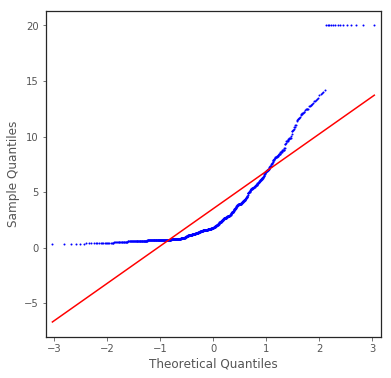

(0, 21)

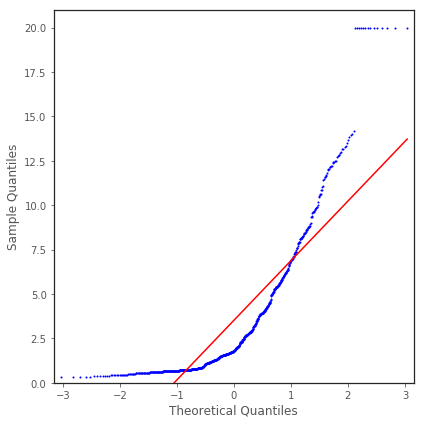

In [206]:
import scipy.stats as stats

import statsmodels.api as sm

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, facecolor='white', frameon=True)

measurements = -np.log10(df4.pvalue   )
# stats.probplot(measurements, dist="norm", plot=pylab)
sm.qqplot(measurements, line='r', ax=ax, markersize=1, dist='norm')
ax.set_ylim(0, 21)
plt.tight_layout()
plt.savefig('{}noncoding_hotspot_qqplot_publication.png'.format(wkdir), dpi=300, bbox_inches='tight')
plt.show()

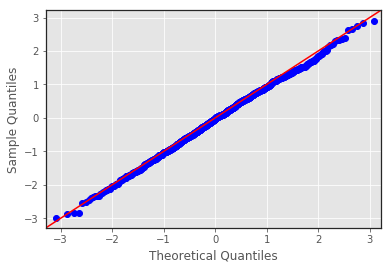

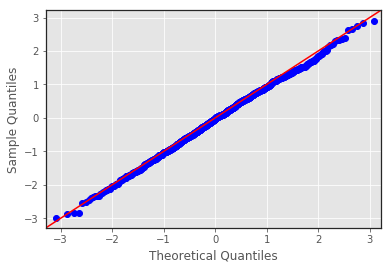

In [173]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

test = np.random.normal(0,1, 1000)

sm.qqplot(test, line='45')
plt.show()

In [336]:
# df4.fillna(0, inplace=True)

In [57]:
df4.to_csv('/projects/trans_scratch/validations/workspace/szong/Cervical/hotspots/123_patients/hotspots_pvalues.txt', sep='\t', index=False)

In [58]:
f = '/projects/trans_scratch/validations/workspace/szong/Cervical/hotspots/123_patients/genes_fdr_bh_e-5.txt'
df10 = pd.read_csv(f, sep='\t', header=None)
df10.columns = ['chrom', 'hs_start', 'hs_end', 'accu_start', 'fdr_bh', 'ensg', 'gene', 'annotation', 'texty']
df10

,chrom,hs_start,hs_end,accu_start,fdr_bh,ensg,gene,annotation,texty
0,1,12891265,12892999,12891265,1.780473e-08,ENST00000437584,PRAMEF11,PRAME_family_member_11_[Source:HGNC_Symbol;Acc...,16
1,1,17222600,17223698,17222600,6.043776e-06,ENST00000375541,CROCC,"ciliary_rootlet_coiled-coil,_rootletin_[Source...",14
2,2,132559600,132561234,381810221,4.136717e-06,ENST00000303798,C2orf27B,chromosome_2_open_reading_frame_27B_[Source:HG...,14
3,4,190859974,190862601,881332398,1.613862e-11,ENST00000226798,FRG1,FSHD_region_gene_1_[Source:HGNC_Symbol;Acc:3954],16
4,6,32497743,32499399,1095039703,3.288039e-07,ENST00000374975,HLA-DRB5,"major_histocompatibility_complex,_class_II,_DR...",14
5,9,33401853,33402120,1572561565,7.632532e-07,ENST00000297988,AQP7,aquaporin_7_[Source:HGNC_Symbol;Acc:640],14
6,10,127583104,127585339,1807956247,8.814857e-10,ENST00000284688,DHX32,DEAH_(Asp-Glu-Ala-His)_box_polypeptide_32_[Sou...,16
7,10,127583104,127585339,1807956247,8.814857e-10,ENST00000368689,FANK1,fibronectin_type_III_and_ankyrin_repeat_domain...,14
8,14,19551365,19553199,2219487544,1.259378e-08,ENST00000409832,POTEG,"POTE_ankyrin_domain_family,_member_G_[Source:H...",14
9,15,22831395,22833799,2330117114,6.014286e-19,ENST00000283645,TUBGCP5,"tubulin,_gamma_complex_associated_protein_5_[S...",16


In [61]:
df4.head(2)

,chrom,hs_start,hs_end,num_mutated_bases,num_patients,pvalue,accu_start,fdr_bh
0,1,10089,10578,16,16,1.907363e-13,10089.0,5.353333e-12
50,1,144615106,144615356,3,4,9.481536e-05,144615106.0,3.168037e-04


In [67]:
df4['num_patients_per_kb'] = df4.num_patients/(df4.hs_end - df4.hs_start)*1e3

In [110]:
df4 = df4.set_index(['chrom', 'hs_start', 'hs_end'])

In [127]:
df5 = pd.merge(df4, dfn, left_index=True, right_index=True, how='left')

In [115]:
df5.to_csv('/projects/trans_scratch/validations/workspace/szong/Cervical/hotspots/123_patients/a.tmp')

In [128]:
df5.fillna(0, inplace=True)

In [129]:
def fisher(np, nn, npos, nneg):
    # npos number of hiv pos patients in the cohort
    # np number of hiv pos patients with at least one  mutation in hotspot
    oddsratio, p = stats.fisher_exact([[np, nn], [npos-np, nneg-nn]])
    return p

def calculate_fisher_pvalue(df):
    df['fisher_pvalue'] = df[['num_hiv_pos_patients', 'num_hiv_neg_patients']]\
    .apply(lambda x: fisher(x['num_hiv_pos_patients'], x['num_hiv_neg_patients'], npos, nneg ),axis=1)

In [130]:
npos = 74
nneg = 49
calculate_fisher_pvalue(df5)

In [132]:
df5.sort_values('fisher_pvalue')

num_mutated_bases  num_patients        pvalue  \
chrom hs_start  hs_end                                                     
10    11325672  11326999                  14            12  3.223311e-12   
20    29637135  29638625                  11            13  8.609651e-08   
2     133030464 133030704                  4             4  4.138881e-06   
1     143467428 143468009                  8             9  5.719740e-09   
20    29647887  29648412                   3             6  2.319713e-03   
8     140767571 140768021                  8             8  1.506782e-09   
11    3602011   3602782                    2             3  2.990213e-02   
2     121148814 121149054                  3             3  9.270942e-05   
      87641722  87641986                   3             3  1.336012e-04   
16    86878225  86878710                   3             3  1.276324e-03   
4     33838683  33839040                   3             3  3.245770e-04   
1     144614200 144614958                  3             3  5.637417e-03   
      148241355 148242150                 13            13  3.386180e-13   
8     139704030 139704240                  5             6  1.031639e-07   
2     114340115 114340477                  5             5  1.674153e-06   
4     190821921 190822165                  4             5  3.228533e-06   
6     34039002  34039333                   5             5  6.191454e-07   
1     17222600  17223698                   8             9  1.184350e-06   
7     157940087 157940780                 10             9  1.613057e-10   
13    113527309 113527570                 14            17  6.528111e-14   
2     90413051  90413335                  12            11  1.121325e-14   
      90413370  90413586                   6             8  2.355970e-09   
9     33796789  33797239                   3             4  5.677137e-04   
2     243152473 243152729                  4             4  5.658293e-06   
3     75834154  75834799                   3             4  4.937074e-03   
7     142462612 142462992                  5             4  2.466022e-06   
22    17048220  17048424                   3             4  1.198572e-05   
21    43226541  43226751                   5             5  2.461617e-08   
4     190817176 190817396                  4             5  1.949370e-06   
      190880905 190881155                  6             5  4.060605e-09   
...                                      ...           ...           ...   
9     68403199  68403499                   0             0  2.179605e-01   
      68400067  68400418                   0             0  2.499718e-01   
      68380297  68380561                   6             5  3.370110e-09   
      73539187  73539573                   0             0  2.711789e-01   
      99983685  99984635                   7             7  1.635802e-06   
      99983057  99983664                   0             0  3.919125e-01   
8     134226449 134227135                  0             0  5.027086e-01   
      12522941  12523385                   2             3  1.095193e-02   
      134225111 134225321                  0             0  1.925311e-01   
      578200    578399                     1             1  1.787487e-02   
7     4177400   4177847                    0             0  3.521725e-01   
      142127640 142127934                  1             1  3.367232e-02   
      142130718 142131098                  8             6  2.292593e-10   
      142152804 142153064                  0             0  2.231551e-01   
      142193303 142193720                  0             0  3.330195e-01   
      150606845 150607127                  5             6  4.405422e-07   
      142153143 142153523                  0             0  3.086159e-01   
      157941717 157941833                  1             1  5.840185e-03   
9     141042000 141042353                  0             0  2.512001e-01   
7     142191087 142191520                  0             0  3.433038e-01   

In [151]:
1/842*0.05

5.938242280285036e-05

In [153]:
1/25*0.25

0.01

In [158]:
# default alpha = 0.05
p_adjusted = multitest.multipletests(df5.sort_values('fisher_pvalue')['fisher_pvalue'].head(100), method = 'fdr_bh')[1]

In [159]:
p_adjusted

array([0.16819465, 0.29441166, 0.34830512, 0.34830512, 0.34830512,
       0.34830512, 0.34830512, 0.34830512, 0.34830512, 0.34830512,
       0.34830512, 0.34830512, 0.34830512, 0.34830512, 0.34830512,
       0.34830512, 0.34830512, 0.34830512, 0.34830512, 0.34830512,
       0.34830512, 0.34830512, 0.34830512, 0.34830512, 0.34830512,
       0.34830512, 0.34830512, 0.34830512, 0.34830512, 0.34830512,
       0.34830512, 0.34830512, 0.34830512, 0.34830512, 0.34830512,
       0.34830512, 0.34830512, 0.34830512, 0.34830512, 0.34830512,
       0.34830512, 0.34830512, 0.34830512, 0.34830512, 0.34830512,
       0.38206939, 0.38206939, 0.38206939, 0.38206939, 0.38206939,
       0.38206939, 0.38206939, 0.38206939, 0.38206939, 0.38206939,
       0.38206939, 0.38206939, 0.38206939, 0.38206939, 0.38206939,
       0.38206939, 0.38206939, 0.38206939, 0.38206939, 0.38206939,
       0.38206939, 0.38206939, 0.38206939, 0.38206939, 0.38206939,
       0.38206939, 0.38206939, 0.38993783, 0.38993783, 0.38993

In [144]:
df5['fisher_fdr_bh'] = p_adjusted
df5.sort_values('fisher_pvalue', ascending=True).head(2)

,,,num_mutated_bases,num_patients,pvalue,accu_start,fdr_bh,num_patients_per_kb,patient,num_hiv_pos_patients,num_hiv_neg_patients,num_total_patients,fisher_pvalue,fisher_fdr_bh
chrom,hs_start,hs_end,,,,,,,,,,,,
10,11325672,11326999,14,12,3.223311e-12,1.691699e+09,5.654224e-11,9.042954,"{HTMCP-03-06-02071, HTMCP-03-06-02144, HTMCP-0...",12.0,0.0,12.0,0.001682,1.0
20,29637135,29638625,11,13,8.609651e-08,2.748210e+09,5.753434e-07,8.724832,"{HTMCP-03-06-02427, HTMCP-03-06-02176, HTMCP-0...",3.0,10.0,13.0,0.005888,1.0


(-3, 20)

[]

Text(0,0.5,'-log10(FDR_BH)')

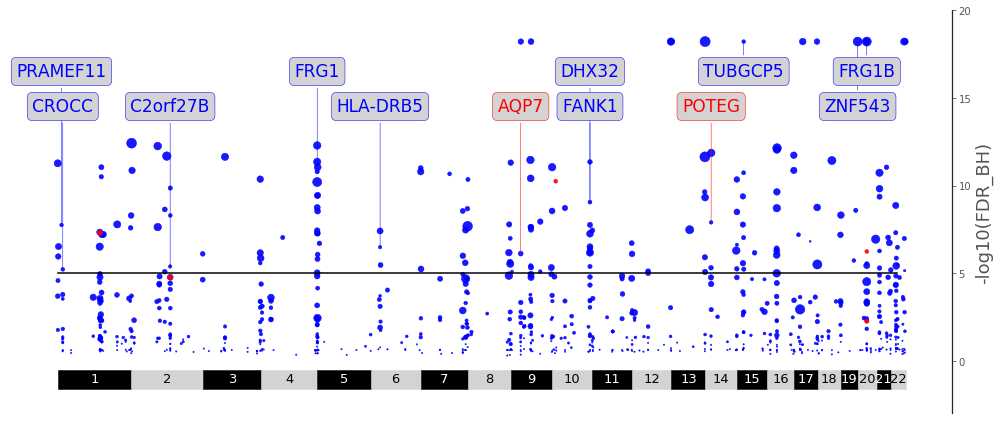

In [142]:
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(111, facecolor='white', frameon=True)

# plot baseline
start = 0
end = 0
baseline = 8
for ch, length in enumerate(chr_length):
    if ch <22:
        ch+=1
        end+=length
        midpoint = (start + end)/2
#         _ = ax.text(midpoint, -2.3, ch, ha='center')
        if ch%2 == 1:
            _ = fill([start, end, end, start], [-0.5, -0.5, -1.6, -1.6], 'black', alpha=1, edgecolor='black')
            _ = ax.text(midpoint, -1.2, ch, ha='center', color='white', fontsize=13)
        elif ch%2 == 0:
            _ = fill([start, end, end, start], [-0.5, -0.5, -1.6, -1.6], 'lightgray', alpha=1, edgecolor='lightgray')
            _ = ax.text(midpoint, -1.2, ch, ha='center', color='black',fontsize=13)
        start+=length
# axhline(10)

df_unenriched = df5[df5.fisher_pvalue>=0.05]
_ = ax.scatter(df_unenriched.accu_start, -np.log10(df_unenriched.fdr_bh), s=2+df_unenriched.num_patients_per_kb*1.5, c='blue', alpha=0.9)

df_enriched = df5[df5.fisher_pvalue<0.05]
_ = ax.scatter(df_enriched.accu_start, -np.log10(df_enriched.fdr_bh), s=2+df_enriched.num_patients_per_kb*1.5, c='red', alpha=0.9)

_ = ax.plot((0, 2.85e9), (5,5), color='black')

for ix, row in df10.iterrows():
    gene = row.gene
    x = row.accu_start
    y = -np.log10(row.fdr_bh)
    
    texty = row.texty
    anno_color = 'blue'
    anno_ecolor = 'blue'
    arrow_color = 'blue'
    fill_color = 'lightgray'
    if gene in ['POTEG', 'AQP7']:
        anno_color = 'red'
        anno_ecolor = 'red'
        arrow_color = 'red'
        
    _ = ax.annotate('{}'.format(gene),
                xy=(x,y), 
                xytext=(x, texty), fontsize=17,
                ha='center', va='bottom', color=anno_color,
                textcoords='data', xycoords="data", 
                bbox=dict(boxstyle='round', 
                          fc=fill_color, 
                          edgecolor=anno_ecolor,
                          alpha=1, pad=.3),
                arrowprops=dict(arrowstyle='-', 
                                color=anno_color,
                                shrinkB=0, 
                                connectionstyle='arc3,rad=0.0' 
                              ))



ax.set_ylim(-3, 20)
_ = ax.set_yticks([0,5,10,15,20])
ax.set_xticklabels('')

ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
# print(ax.get_yticklabels())
ax.yaxis.tick_right()
ax.set_ylabel('-log10(FDR_BH)', fontsize=18)
ax.yaxis.set_label_position("right")
_ = plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.tight_layout()
plt.savefig('{}noncoding_hotspot_publication.png'.format(wkdir), dpi=300, bbox_inches='tight')
plt.show()

In [75]:
df4.num_patients_per_kb.max()
df4.num_patients_per_kb.min()
df4.num_patients.max()
df4.num_patients.min()

66.96428571428571

0.0

39

0

scipy binomial distribution

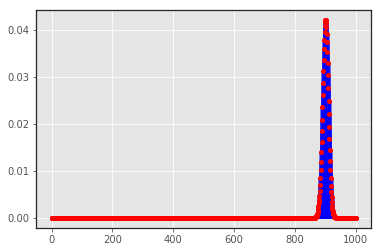

In [72]:
from scipy.stats import binom
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
n, p = 1000, 0.9
# mean, var, skew, kurt = binom.stats(n, p, moments='mvsk')
# x = np.arange(binom.ppf(0.01, n, p),
#              binom.ppf(0.99, n, p))
x = np.arange(0,n+1,1)
ax.plot(x, binom.pmf(x, n, p), 'ro', ms=4, label='binom pmf')
ax.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)

In [299]:
binom.pmf(x, n, p)

array([5.9049e-01, 3.2805e-01, 7.2900e-02, 8.1000e-03, 4.5000e-04,
       1.0000e-05])

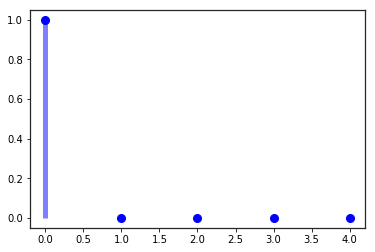

In [20]:
n=100
p=1.9999899999900705e-05
rv = binom(n, p)
fig, ax = plt.subplots(1, 1)
x = range(0,5,1)
ax.plot(x, binom.pmf(x, n, p), 'bo', ms=8, label='binom pmf')
ax.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)

# ax.vlines(x, 0, rv.pmf(x), colors='k', linestyles='-', lw=1,
#         label='frozen pmf')
# ax.legend(loc='best', frameon=False)
plt.show()


In [14]:
x

array([0., 1., 2., 3., 4.])

In [15]:
binom.ppf(0.01, n, p)

0.0

In [16]:
binom.ppf(0.99, n, p)

5.0

# ignore below

visualize all cnvs in one plot

In [60]:
%%bash
# run this in this dir: 
bedtools=/home/rcorbett/aligners/bedtools/BEDTools-Version-2.15.0/bin/bedtools
cd /projects/trans_scratch/validations/workspace/szong/Cervical/cnv/bin_segs/
sort -k1n -k2n -k3n amps_cleaned.txt > amps_cleaned.txt.sorted
sort -k1n -k2n -k3n dels_cleaned.txt > dels_cleaned.txt.sorted
$bedtools intersect -a chr_bins.txt -b dels_cleaned.txt.sorted -wa -wb > dels_cleaned_bins_1kb.txt
$bedtools intersect -a chr_bins.txt -b amps_cleaned.txt.sorted -wa -wb > amps_cleaned_bins_1kb.txt

In [61]:
patients = df2.patient.value_counts().index.tolist()

In [62]:
f = '/projects/trans_scratch/validations/workspace/szong/Cervical/cnv/bin_segs/amps_cleaned_bins_1kb.txt'
df = pd.read_csv(f, sep='\t', header=None)
df.columns = ['bin_chr', 'bin_start', 'bin_end', 'chr', 'start', 'end', 'cn', 'patient']
occurrence = df.groupby(['bin_chr', 'bin_start', 'bin_end']).nunique()['patient']#.sort_values(ascending=False)
recur_amps = occurrence.reset_index().sort_values(['bin_chr', 'bin_start', 'bin_end'])
f = '/projects/trans_scratch/validations/workspace/szong/Cervical/cnv/bin_segs/amps_cleaned_bins_1kb_patients.txt'
# recur_amps.to_csv(f, index=False, sep='\t')
# recur_amps = pd.read_csv(f, sep='\t')

In [63]:
recur_amps.head(2)

,bin_chr,bin_start,bin_end,patient
0,1,38001,39000,1
1,1,39001,40000,2


In [64]:
f11 = '/projects/trans_scratch/validations/workspace/szong/Cervical/cnv/bin_segs/chr_bins.txt'
df11 = pd.read_csv(f11, sep='\t', header=None)
df11.columns = ['bin_chr', 'bin_start', 'bin_end']
df11.set_index(['bin_chr', 'bin_start', 'bin_end'], inplace=True)
# df11['patient'] = 0
df11.head()

Empty DataFrame
Columns: []
Index: [(1, 1, 1000), (1, 1001, 2000), (1, 2001, 3000), (1, 3001, 4000), (1, 4001, 5000)]

In [65]:
def reindex_df(indf):
    df = indf.set_index(['bin_chr', 'bin_start', 'bin_end']).reindex(df11.index)
    df.fillna(0, inplace=True)
    df['fraction_patients'] = df.patient/ len(HIV_pos)
    df.drop('patient', inplace=True, axis=1)
    return df

In [66]:
# df_amps.reset_index()['bin_start'].cumsum() # not just accumulateive sum, depending on chr.

In [67]:
def calculate_fractions(df):
    end = 0
    all_positions = []
    all_fractions = []
    for ch, length in enumerate(chr_length):
        ch+=1
        positions = list(end + np.array(df.iloc[df.index.get_level_values('bin_chr') == ch].index.get_level_values('bin_start').tolist()))
        all_positions = all_positions + positions
        fractions = df.iloc[df.index.get_level_values('bin_chr') == ch]['fraction_patients'].tolist()
        all_fractions = all_fractions + fractions
        end+=length
    return (all_positions, all_fractions)




In [68]:
f = '/projects/trans_scratch/validations/workspace/szong/Cervical/cnv/bin_segs/dels_cleaned_bins_1kb.txt'
df = pd.read_csv(f, sep='\t', header=None)
df.columns = ['bin_chr', 'bin_start', 'bin_end', 'chr', 'start', 'end', 'cn', 'patient']
occurrence = df.groupby(['bin_chr', 'bin_start', 'bin_end']).nunique()['patient']#.sort_values(ascending=False)
recur_dels = occurrence.reset_index().sort_values(['bin_chr', 'bin_start', 'bin_end'])
f = '/projects/trans_scratch/validations/workspace/szong/Cervical/cnv/bin_segs/dels_cleaned_bins_1kb_patients.txt'
# recur_dels.to_csv(f, index=False, sep='\t')
# recur_dels = pd.read_csv(f, sep='\t')

In [69]:
recur_dels.head(2)

,bin_chr,bin_start,bin_end,patient
0,1,46001,47000,1
1,1,47001,48000,2


In [70]:
hiv_pos_recur_dels = recur_dels
hiv_pos_recur_amps = recur_amps
# hiv_neg_recur_dels = recur_dels
# hiv_neg_recur_amps = recur_amps

In [24]:
# 2 patient has no cnv? 2261 and 2262 have no cnvs
len(patients)
set(HIV_neg) - set(patients)

set()

,size
chr,
1,249250621
2,243199373


In [73]:
# initiate occupied label coordinates dict
#.astype(str)
y_coords = np.arange(6, .5, -0.5)
ycoords_dict = {}
for i in y_coords:
    ycoords_dict[i] = []
    
# initiate label coordinates df
df = pd.DataFrame(columns=['gene', 'x', 'y', 'all_oncogenes', 'anno_color', 'anno_ecolor', 'arrow_color'])
fdir = '/projects/trans_scratch/validations/workspace/szong/Cervical/cnv/'

gistic_f = '{}124_patient_adj_hiv_pos/amp_genes.conf_99.txt.summary.sorted'.format(fdir)
coordinates, genes = get_gene_coords(gistic_f)
# hiv_pos amps
anno_baseline = 6
anno_color = 'red'
anno_ecolor = 'red'
arrow_color = 'red'
ycoords_dict, df = arrange_genes(genes, coordinates, anno_baseline, 
                                 anno_color, anno_ecolor, arrow_color, 
                                 ycoords_dict, df)
# print(df)
gistic_f = '{}124_patient_adj_hiv_pos/del_genes.conf_99.txt.summary.sorted'.format(fdir)
coordinates, genes = get_gene_coords(gistic_f)
# hiv_pos dels

anno_color = 'blue'
anno_ecolor = 'red'
arrow_color = 'blue'
ycoords_dict, df = arrange_genes(genes, coordinates, anno_baseline, 
                                 anno_color, anno_ecolor, arrow_color, 
                                 ycoords_dict, df)
# print(df)

# plot hiv_neg genes
gistic_f = '{}124_patient_adj_hiv_neg/amp_genes.conf_99.txt.summary.sorted'.format(fdir)
coordinates, genes = get_gene_coords(gistic_f)
# amps

anno_color = 'red'
anno_ecolor = 'blue'
arrow_color = 'red'
ycoords_dict, df = arrange_genes(genes, coordinates, anno_baseline, 
                                 anno_color, anno_ecolor, arrow_color, 
                                 ycoords_dict, df)

gistic_f = '{}124_patient_adj_hiv_neg/del_genes.conf_99.txt.summary.sorted'.format(fdir)
coordinates, genes = get_gene_coords(gistic_f)
# del

anno_color = 'blue'
anno_ecolor = 'blue'
arrow_color = 'blue'
ycoords_dict, df = arrange_genes(genes, coordinates, anno_baseline, 
                                 anno_color, anno_ecolor, arrow_color, 
                                 ycoords_dict, df)

In [80]:
df.head(2)

,gene,x,y,all_oncogenes,anno_color,anno_ecolor,arrow_color
0,"NFE2L2,HOXD11",427045635,6.0,"NFE2L2,HOXD11,HOXD13",red,red,red
1,DLG1,689437826,5.5,DLG1,red,red,red


In [92]:
f = '{}genes_to_highlight.txt'.format(wkdir)
# df.to_csv(f, sep='\t', index=False)
df = pd.read_csv(f, sep='\t')
df.head(2)

,gene,x,y,all_oncogenes,anno_color,anno_ecolor,arrow_color,fill_color
0,"NFE2L2,HOXD11",427045635,6.0,"NFE2L2,HOXD11,HOXD13",red,red,red,lightgray
1,DLG1,689437826,5.5,DLG1,red,red,red,white


In [ ]:
plt.plotpal